## Problema del  Cumpleaños
En una habitación encontramos n personas. ¿Cuál es el número n más bajo que asegura que tengas más de un 50% de posibilidades de que dos cualesquiera de ellas cumplan años en el mismo día?

## Solución
Calculemos la probabilidad de que no coincidan en su día de cumpleaños dos personas. Para ello damos por hecho que una de ellas ya se encuentra en la habitación y  a continuación entra la segunda. ¿Qué probabilidad tiene de NO coincidir en su día de cumpleaños con la que ya está?, pués 364 entre 365, tiene 364 posibles días..todo el año excepto el día en el que nació la primera persona : 

$$ p\_no\_coincidencia_{2}= 364/365= 0.0027397 $$

luego la probabilidad de coincidencia es la complementaria : 

$$p_{2}=1- p\_no\_coincidencia_{2}= 1-364/365$$

A continuación entra una tercera persona. ¿Qué probabilidad hay de que NO coincidan ninguna de las tres? : pues la multiplicación de dos probabilidades, la probabilidad de que la tercera no concida con ninguna de las dos exsitente (363/365) multiplicada por la probabilidad de que los dos primeras no hayan nacido el mismo día : $p\_no\_coincidencia_{2}$

$$p\_no\_coincidencia_{3}=\frac{363}{365}p\_no\_coincidencia_{2} = \frac{363*364}{365*365}$$

y de igual manera la probabilidad de coincidencia para tres personas será tal que :

$$p_3=1-p\_no\_coincidencia_{3}=1-\frac{363*364}{365*365}=0.008204$$

A continuación entra una cuarta. Siguiendo el mismo razonamiento encontramos que la probabilidad  de NO coincidencia de ninguna de las cuatro es tal que multiplicar la probabilidad de que la cuarta no coincida con ninguna de las tres existentes multiplicado por la probabilidad de que las tres ya existente  no coincidan tampoco : 
$$p\_no\_coincidencia_{4}=\frac{362}{365}p\_no\_coincidencia_{3} = \frac{362*363*364}{365*365*365}$$

y de igual manera la probabilidad de coincidencia será : 
$$p_4=1-p\_no\_coincidencia_{4}=1-\frac{362*363*364}{365*365*365}=0.0163559$$

Y podemos generalizar fórmula genérica tal que :  
$$  \large p_{i}=\left (1-\frac{364 !}{(365-i)! \enspace 365^{i-1}}\right) \enspace \forall i \in \mathbb{N}_{>1} $$

Bastará con ir incrementando i, hasta que la probabilidad calculada sea mayor que 0,5 .

Vamos a realizar esos cálculos con unas líneas de Python : 

Empecemos importando una serie de librerías que nos ayudarán a realizar esos cálculos : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import math

Usemos una variable para el número de días en el año (asumimos que no hay bisiestos) : 

In [2]:
n_dias_año=365

Creamos una función p, que calcula la probabilidad de concidencia de n personas, codificando tal cual la fórmula que calculamos antes : 

In [3]:
def p(n):
    #nos aseguramos de que el parámetro pasado es un integer,
    #para evitar errores en el cálculo del factorial
    n=int(n)
    prob_aux=math.factorial(n_dias_año-1)/
    (math.factorial(n_dias_año-n)*n_dias_año**(n-1))
    return 1-prob_aux

Saquemos por pantalla una tabla con los valores, hasta, digamos, 100 personas : 

In [4]:
n_max=60

In [5]:
for i in range(2,n_max):
    print ('Para {:>2} personas : probabilidad {:1.2f}% '.format(i,100*p(i)))

Para  2 personas : probabilidad 0.27% 
Para  3 personas : probabilidad 0.82% 
Para  4 personas : probabilidad 1.64% 
Para  5 personas : probabilidad 2.71% 
Para  6 personas : probabilidad 4.05% 
Para  7 personas : probabilidad 5.62% 
Para  8 personas : probabilidad 7.43% 
Para  9 personas : probabilidad 9.46% 
Para 10 personas : probabilidad 11.69% 
Para 11 personas : probabilidad 14.11% 
Para 12 personas : probabilidad 16.70% 
Para 13 personas : probabilidad 19.44% 
Para 14 personas : probabilidad 22.31% 
Para 15 personas : probabilidad 25.29% 
Para 16 personas : probabilidad 28.36% 
Para 17 personas : probabilidad 31.50% 
Para 18 personas : probabilidad 34.69% 
Para 19 personas : probabilidad 37.91% 
Para 20 personas : probabilidad 41.14% 
Para 21 personas : probabilidad 44.37% 
Para 22 personas : probabilidad 47.57% 
Para 23 personas : probabilidad 50.73% 
Para 24 personas : probabilidad 53.83% 
Para 25 personas : probabilidad 56.87% 
Para 26 personas : probabilidad 59.82% 
Para 27 

Podemos comprobar que n=23 es nuestra solución...con una probabilidad de 50.73%.
Además para 57 personas vemos que tenemos más de un 99% de posibilidades de que coincida el cumpleaños de dos de ellas.

Podemos dibujar esa tabla en un gráfico. Disminuimos n_max a 50 por claridad : 

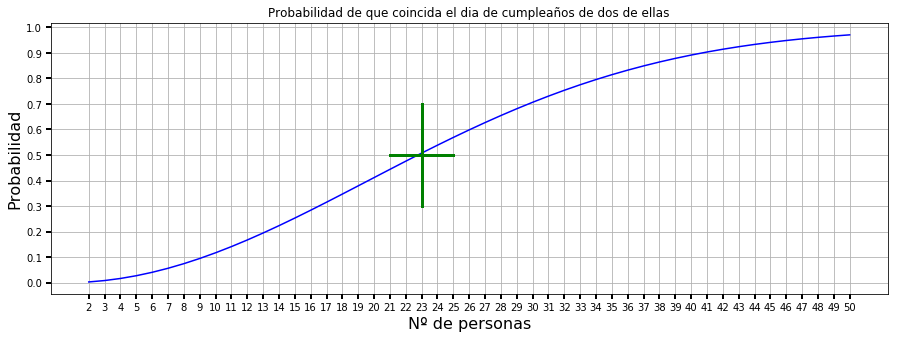

In [6]:
n_max=50
fig1, ax1 = plt.subplots(figsize=(15, 5))
y=[p(i) for i in np.arange(2,n_max+1)]
x=np.arange(2,n_max+1).tolist()
linea = ax1.plot(x,y,color='b')
ax1.xaxis.set_ticks(x)
ax1.yaxis.set_ticks(np.arange(0,1.01,0.1))
ax1.set_xlabel('Nº de personas',size=16)
ax1.set_ylabel('Probabilidad',size=16)
ax1.tick_params(axis='x',direction='out', length=5, width=2, colors='black')
ax1.tick_params(axis='y',direction='out', length=5, width=2, colors='black')
ax1.grid(b=True)
plt.plot([21,25],[.5,.5],color='g',lw=3)
plt.plot([23,23],[0.3,0.7],color='g',lw=3)
ax1.set_title('Probabilidad de que coincida el dia de cumpleaños de dos de ellas')
plt.show()